In [164]:
!pip install pandas 
#跟終端不同的是在Jupyter，pip前面要加上「!」
import pandas as pd #pd是別名 
#pandas可以讀取各種檔案轉成欄列式資料格式。在使用大量資料運算時效能表現優於原生的 Python 資料結構。
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
import re #Python 中做正規運算式的模組
fb = pd.read_csv('nysu_10902_2019_research_right.csv')
#fb_2= pd.read_csv('nysu_10902_2019立委_research_補.csv')
politics = pd.read_csv('9th_legislator_promise.csv')#原檔是xlxs檔，不能懶惰直接重新命名成csv檔，要打開另存新檔時改 #politics
#跑出來沒亂碼ok
fb.shape   #顯示出資料共有(X行,Y列)
fb.columns
#fb.dtypes    #顯示資料類型
fb['page_name'].unique()

C:\Users\User\miniconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘'], dtype=object)

In [66]:
Zhao = fb[fb.page_name == "趙天麟"]#發現後來補充的csv檔沒有趙天麟
#Zhao.shape #613筆貼文
#Zhao['new_date'] = pd.to_datetime(Zhao['created_time_taipei']).dt.date
#Zhao['created_time_taipei']#1910    2019-01-15T16:43:50
#pd.to_datetime(Zhao['created_time_taipei'])#1910   2019-01-15 16:43:50
#pd.to_datetime(Zhao['created_time_taipei']).dt #pandas.core.indexes.accessors.DatetimeProperties object at 0x00000289929FB688
#pd.to_datetime(Zhao['created_time_taipei']).dt.date #1910    2019-01-15

# 把時間格式轉換
#to_datetime將該列資料轉換為時間型別，即datetime。
Zhao['new_date'] = pd.to_datetime(Zhao['created_time_taipei']).dt.date
Zhao['post_hour'] = pd.to_datetime(Zhao['created_time_taipei']).dt.hour 
Zhao['month_year'] = pd.to_datetime(Zhao['new_date']).dt.to_period('M')#最小單位是月
Zhao.head(5)
Zhao['new_date'].dtypes #dtype('O')
Zhao['post_hour'].dtypes #dtype('int64')
Zhao['month_year'].dtypes #period[M] 

C:\Users\User\miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\User\miniconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\User\miniconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

period[M]

In [108]:
results=Zhao.groupby('month_year').sum()
results #注意，因為前面id是int64，所以這邊也會被加起來，其實前面要先轉換

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
month_year,,,,,,,,,,
2019-01,4360193432972200,15753,0,0,0,0,0,1943,426,534
2019-02,4142183761323590,18115,0,0,0,0,0,2424,557,552
2019-03,4796212776269420,36581,0,0,0,0,0,4167,573,670
2019-04,4360193432972200,50847,0,0,0,0,0,4345,449,621
2019-05,4142183761323590,32592,0,0,0,0,0,2350,331,580
2019-06,5995265970336775,61901,0,0,0,0,0,3750,736,824
2019-07,5777256298688165,108069,0,0,0,0,0,5155,2006,737
2019-08,5995265970336775,130074,0,0,0,0,0,6190,2420,902
2019-09,4360193432972200,132079,0,0,0,0,0,6455,2054,592


In [68]:
results.index.name='month_years'
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
month_years,,,,,,,,,,
2019-01,4360193432972200,15753,0,0,0,0,0,1943,426,534
2019-02,4142183761323590,18115,0,0,0,0,0,2424,557,552
2019-03,4796212776269420,36581,0,0,0,0,0,4167,573,670
2019-04,4360193432972200,50847,0,0,0,0,0,4345,449,621
2019-05,4142183761323590,32592,0,0,0,0,0,2350,331,580
2019-06,5995265970336775,61901,0,0,0,0,0,3750,736,824
2019-07,5777256298688165,108069,0,0,0,0,0,5155,2006,737
2019-08,5995265970336775,130074,0,0,0,0,0,6190,2420,902
2019-09,4360193432972200,132079,0,0,0,0,0,6455,2054,592


In [69]:
results.columns #month_years不是column

Index(['page_id', 'like_count', 'haha_count', 'love_count', 'angry_count',
       'sad_count', 'wow_count', 'comment_count', 'share_count', 'post_hour'],
      dtype='object')

In [109]:
results.reset_index(inplace=True)
results

,month_year,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-01,4360193432972200,15753,0,0,0,0,0,1943,426,534
1,2019-02,4142183761323590,18115,0,0,0,0,0,2424,557,552
2,2019-03,4796212776269420,36581,0,0,0,0,0,4167,573,670
3,2019-04,4360193432972200,50847,0,0,0,0,0,4345,449,621
4,2019-05,4142183761323590,32592,0,0,0,0,0,2350,331,580
5,2019-06,5995265970336775,61901,0,0,0,0,0,3750,736,824
6,2019-07,5777256298688165,108069,0,0,0,0,0,5155,2006,737
7,2019-08,5995265970336775,130074,0,0,0,0,0,6190,2420,902
8,2019-09,4360193432972200,132079,0,0,0,0,0,6455,2054,592
9,2019-10,5014222447918030,225785,0,0,0,0,0,7900,3425,693


In [105]:
results.columns #month_years變成column了

Index(['month_year', 'page_id', 'like_count', 'haha_count', 'love_count',
       'angry_count', 'sad_count', 'wow_count', 'comment_count', 'share_count',
       'post_hour'],
      dtype='object')

In [72]:
#以下略
#發文時間分佈
post_time=Zhao[['post_id','post_hour']].groupby('post_hour').count()#為啥要用二維陣列，浪費ㄅ
print("before轉換，post_time.columns=",post_time.columns)#Index(['post_id'], dtype='object')
#post_time.dtypes #object
post_time.columns = ['num of posts'] #vs columns.name = 'num of posts'
post_time.index.name = 'post_hours'  #vs post_time.index = ['post_hour']
#post_time.reset_index(inplace = True) #幹嘛ㄉ
print("after轉換，post_time.columns=",post_time.columns) #post_hours', 'post_id'
print(post_time)

before轉換，post_time.columns= Index(['post_id'], dtype='object')
after轉換，post_time.columns= Index(['num of posts'], dtype='object')
            num of posts
post_hours              
0                      6
1                      1
4                      2
5                      2
6                      1
7                     14
8                     23
9                     41
10                    36
11                    53
12                    56
13                    18
14                    34
15                    45
16                    34
17                    36
18                    37
19                    39
20                    37
21                    39
22                    32
23                    27


In [100]:
#post_time[,'post_hour']
post_time.index

Int64Index([0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
            21, 22, 23],
           dtype='int64', name='post_hours')

In [112]:
results['month_year'].map(str)#map #轉成string#前面轉很辛苦現在又覆蓋轉成string?#沒加s不行是跟Zhao搞混ㄇ?

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
12    2020-01
Name: month_year, dtype: object

In [75]:
#type(results['month_years'])==str) ###F ????

SyntaxError: invalid syntax (<ipython-input-75-a71e62ea215d>, line 1)

In [103]:
#type(results['month_years'])#dtypes跟type的差別??

KeyError: 'month_years'

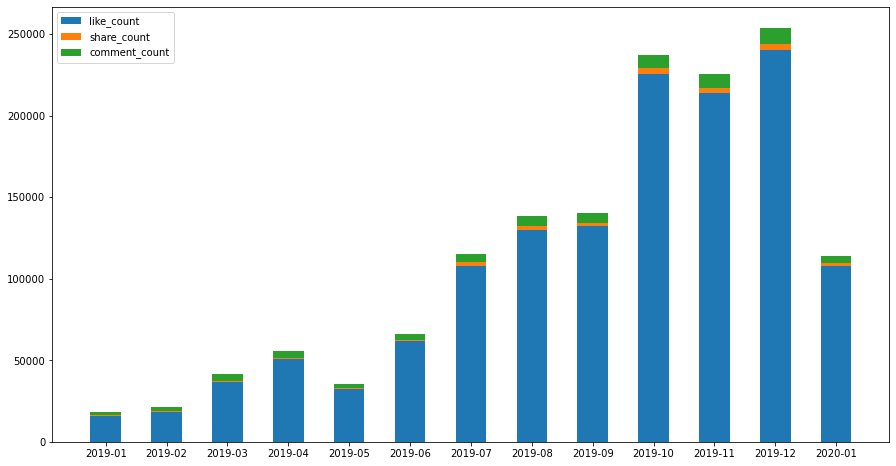

In [126]:
#畫出整年貼文分佈 #用bar版本
import matplotlib.pyplot as plt #
labels = results['month_year'].map(str) #x軸
width = 0.5 # 柱狀圖中每根柱的寬度

fig, ax = plt.subplots()#在圖中分割出子圖
fig.set_size_inches(15, 8)#整張圖大小為15*8
ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])
ax.legend()#放置圖例

In [149]:
#找出讚數數量的統計值 #之後可以跟其他人比較
Zhao['like_count'].describe()#2240
Zhao['share_count'].describe()#34
Zhao['comment_count'].describe()#110

count    613.000000
mean      34.678630
std       56.222796
min        0.000000
25%        7.000000
50%       15.000000
75%       34.000000
max      456.000000
Name: share_count, dtype: float64

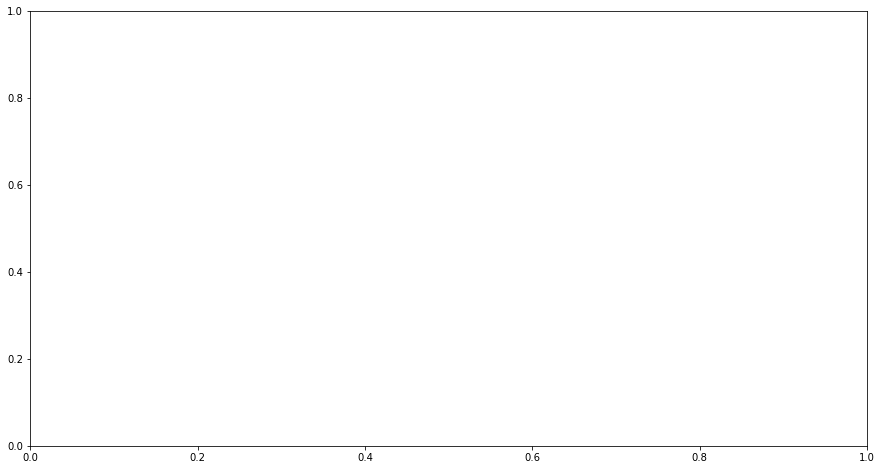

In [127]:
#畫出整年貼文分佈 #用折線圖版本
labels = results['month_year'].map(str)
#fig, axes = plt.subplots(2, 2) #想畫出多圖QQ
fig, axes = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, results['like_count'],label="like_count")
ax.plot(labels,results['share_count'],label="share_count")
ax.plot(labels,results['comment_count'],label="comment_count")
ax.legend()#放置圖例
plt.show()
#不知道為甚麼這次跑不出來

<color=red>如果改用互動率（但需要觸及率或是粉專粉絲人數）</color>

1月少、12月最多合理，因為11號就選舉了。不過10月以前以後的讚數數量有顯著差異。所以我想知道，10月前10月後的貼文內容有什麼差異。首先先來看篇數差異。因為每月篇數也會影響到每月獲得的讚數、分享與留言數。

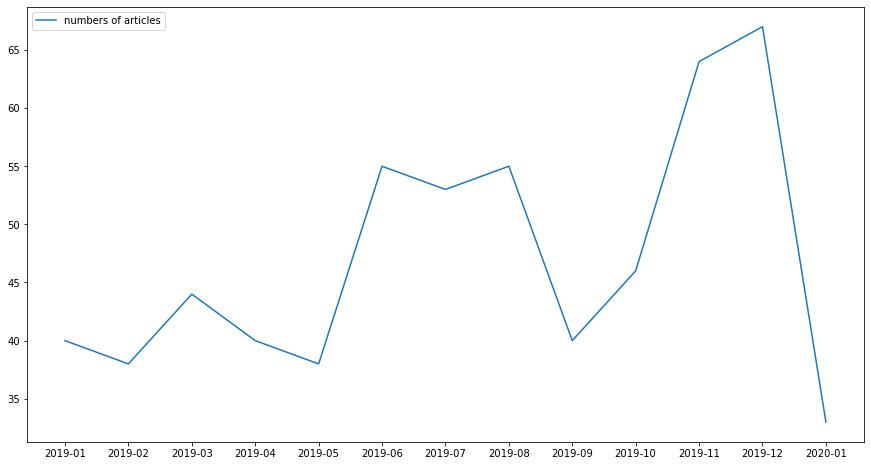

In [118]:
num_of_month=[len(Zhao[Zhao.month_year=="2019-01"]),len(Zhao[Zhao.month_year=="2019-02"]),len(Zhao[Zhao.month_year=="2019-03"]),len(Zhao[Zhao.month_year=="2019-04"]),len(Zhao[Zhao.month_year=="2019-05"]),len(Zhao[Zhao.month_year=="2019-06"]),len(Zhao[Zhao.month_year=="2019-07"]),len(Zhao[Zhao.month_year=="2019-08"]),len(Zhao[Zhao.month_year=="2019-09"]),len(Zhao[Zhao.month_year=="2019-10"]),len(Zhao[Zhao.month_year=="2019-11"]),len(Zhao[Zhao.month_year=="2019-12"]),len(Zhao[Zhao.month_year=="2020-01"])]
num_of_month #list不是用{}，是用[]
#畫出整年貼文數量分佈折線圖
labels = results['month_year'].map(str)
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, num_of_month,label="numbers of articles")
ax.legend()#放置圖例
plt.show()

In [132]:
num_of_month

[40, 38, 44, 40, 38, 55, 53, 55, 40, 46, 64, 67, 33]

In [143]:
print("10月篇數="+str(num_of_month[9])+",讚數="+str(results['like_count'][9])+",讚數/篇數="+str(results['like_count'][9]/num_of_month[9]))
print("11月篇數="+str(num_of_month[10])+",讚數="+str(results['like_count'][10])+",讚數/篇數="+str(results['like_count'][10]/num_of_month[10]))
#results['like_count'][9]
#results['like_count'][10]
#print(results[results['like_count']=="2019-10"])
#print(results[results['like_count']=="2019-11"])

10月篇數=46,讚數=225785,讚數/篇數=4908.369565217391
11月篇數=64,讚數=213935,讚數/篇數=3342.734375


看起來線條曲線變化跟每月文章的讚數留言分享數不太一樣，所以接著來用每月文章的讚數留言分享除以每月篇數來分析。
另外發現10月讚數雖然比11月多11850，但10月但10月篇數比11月少18。

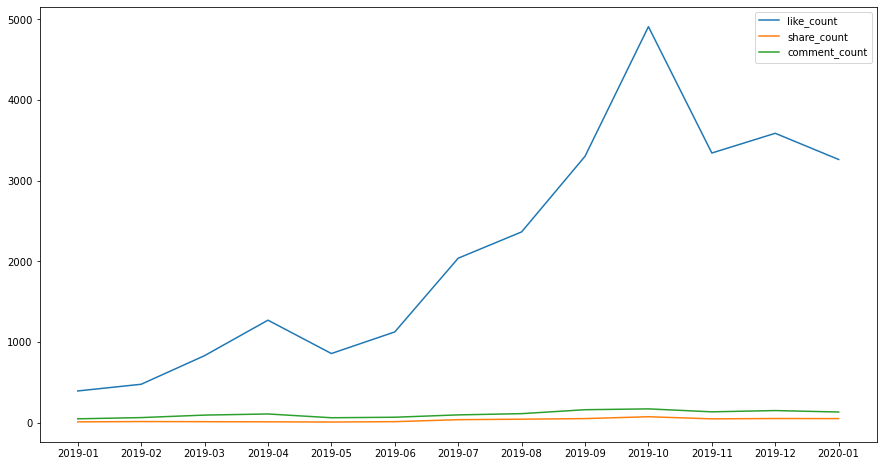

In [82]:
labels = results['month_years'].map(str)
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, results['like_count']/num_of_month,label="like_count")
ax.plot(labels,results['share_count']/num_of_month,label="share_count")
ax.plot(labels,results['comment_count']/num_of_month,label="comment_count")
ax.legend()#放置圖例
plt.show()

In [ ]:
圖中可以發現如果用讚數/當月篇數，10月可以說是表現最好的。接著就來分析10月到底發了什麼。

In [145]:

highest = Zhao[Zhao.month_year == "2019-10"]
results_high = highest.groupby('new_date').sum()
results_high.index.name = 'newhead' #更改欄位名稱
results_high.reset_index(inplace=True)
results_high

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,post_hour
0,2019-10-01,109004835824305,5982,0,0,0,0,0,220,202,9
1,2019-10-02,109004835824305,3595,0,0,0,0,0,168,125,15
2,2019-10-03,218009671648610,5515,0,0,0,0,0,228,59,27
3,2019-10-05,109004835824305,6740,0,0,0,0,0,113,71,11
4,2019-10-06,218009671648610,10746,0,0,0,0,0,392,79,41
5,2019-10-07,327014507472915,12840,0,0,0,0,0,358,124,58
6,2019-10-09,218009671648610,3162,0,0,0,0,0,107,110,22
7,2019-10-10,218009671648610,15322,0,0,0,0,0,280,127,27
8,2019-10-11,109004835824305,705,0,0,0,0,0,27,17,16
9,2019-10-12,218009671648610,2553,0,0,0,0,0,63,36,23


No handles with labels found to put in legend.


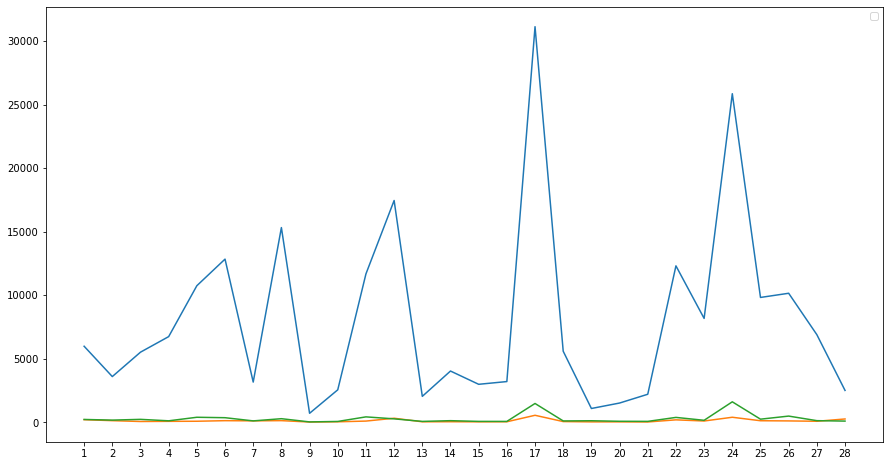

In [146]:
#畫圖看整個10月的按讚、分享、評論數
labels = [str(i) for i in range(1,len(results_high)+1)]
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax.plot(labels, results_high['like_count'])
ax.plot(labels, results_high['share_count'])
ax.plot(labels, results_high['comment_count'])
ax.legend()
plt.show()

In [165]:
#10月有幾天明顯讚數很高，因此找出這幾天的文章，看到底是哪些文章讓10月平均表現變成第一名
oct_Zhao= Zhao[Zhao['month_year'] == "2019-10"]
oct_like_top5 = oct_Zhao.sort_values('like_count',ascending=False).head(5)
oct_like_top5

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
2331,109004835824305_2617772994947464,109004835824305,趙天麟,政治人物,#謝謝今天所有出席的真勇者\n\n真勇者說的不僅僅是今天特地從台中到高雄為我助選的陳柏惟；說的不僅僅是今天站在台上的高雄市議員們，更是今天前金、新興所有的後援會會長、總幹事、副會長們，他們很多人都是現任里長，在市政府換黨執政下，他們具名並且願意站出來支持我，他們也是真勇者。\n\n我也要特別感謝管碧玲委員，我們的管媽，她是一個有智慧，有氣度的長者，由於選區合併，她在今年3月率先宣布放棄連任，讓天麟可以提早經營選區。相信管媽要以豐富的選戰經驗，帶領我們翻轉高雄，打出一場漂亮的勝仗。\n\n陳柏惟在台上，看到現場這麼多市民朋友的熱情，流下了英雄淚，陳柏惟說天麟有強大意志力，天麟是一個馬拉松跑者，我挑戰100公里超級馬拉松，我要做到的事情一定會做到。\n\n文益議員說天麟的選舉很正向，都在傳遞正能量，不攻擊別人，不做負面文宣。今年這場選戰，讓天麟想起9年前的自己。當時我的競選對手是邱毅，大家都叫他「爆料天王」，是一個強勁的對手。天麟當時決定參選立委，宣布不參選議員連任，全力輔選我們這區的市議員，讓我們民進黨在2010年的議會選舉，在第8選區揮出全壘打。也感謝建盟議員等夥伴，全力輔選，讓天麟挑戰成功。\n\n為了紮根基層，提供最接地氣的服務，天麟推動跟里長設立「聯合服務處」。過去天麟在前新苓共同建立將近100個聯合服務處，也跟各區的資深里長一起合作，培育了許許多多的新好里長。我們也從這些跟里長合作完成許多選民服務，也爭取到不少重大建設。\n \n除了貼近選民，提供優質服務外，天麟在立法院歷任衛環委員會、內政委員會及外交國防委員會，並擔任召委，也被公督盟評為優秀立委。天麟重視國際事務及兩岸議題，曾應美國國務院之邀訪問研究，並到日本慶應大學就國際事務及兩岸問題交換意見跟學習。同時，天麟也曾在民進黨中央黨部擔任過青年部主任、新聞部主任以及小英總統擔任黨主席後兩任中國事務部主任，用國際角度看台海問題，全力協助蔡總統建立國際及兩岸論述。在離選戰倒數78天之際，天麟依舊堅守在外交國防委員會，捍衛F16V戰機的預算及強化國安的法案，替小英總統完成抗中保台的任務。\n \n天麟也要特別感謝許多好朋友出席，永達兄特地來支持我，蔡昌達前副議長特別來關心我的選情，後援總會許文欽總會長是我永遠的後盾，後援總會總幹事陳福明協助今天的所有一切，更要感謝前金後援會會長賴勇村及新興後援會會長謝國男所組織的後援會系統。今天距離選舉還有最後77天，台灣要贏，高雄一定要大贏，高雄第六選區如果大贏，高雄市就可以八仙過海，立委通通過關，拜託大家，跟著天麟一起衝，最後77天，我們一直衝！一起衝！\n\n#一人拉一票台中第二選區陳柏惟\n#感謝管媽3Q哥\n#特別感謝蕭永達出席\n#記得我們的微笑手勢\n#謝謝邁家人TaiwanTeam天粉出任務志工夥伴\n#感謝製作天麟手舉牌氣氛超好\n\n3Q 陳柏惟\n管碧玲 (kuanbiling)\n萬事發達蔡昌達\n煥然一新 簡煥宗\n益起打拚－黃文益\n主婦政治力 李雅慧\n鳳山要紅 林智鴻\n高雄市議員鄭孟洳\n高雄市議員郭建盟\n江瑞鴻\n李喬如\n黃秋媖 高雄市議員\n蕭永達,NaN,photo,https://www.facebook.com/109004835824305/posts/2617772994947464/,2019-10-26T11:54:57+0000,2019-10-26T19:54:57,...,0,0,0,0,0,644,267,2019-10-26,19,2019-10
2350,109004835824305_2590707287654035,109004835824305,趙天麟,政治人物,#寶島歌王之夜來囉\n\n天麟邀請您 10/19 (六) 晚上七點，內惟國小金嗓開唱🎤\n\n#陳思安來了\n#良山兄來了\n#南台灣小姑娘高愛來了\n#嚴詠能&打狗亂歌團來了\n#喬幼來了\n#翁立友來了\n\n❤ 高雄樂活節第三場—最經典的寶島歌王之夜，就在本週六鼓山區內惟國小登場。🎤🎤🎤\n\n天麟邀請您親自到場欣賞「小江蕙」陳思安、「寶島歌王」良山兄、嚴詠能&打狗亂歌團、南台灣小姑娘高愛、超級紅星喬幼以及金曲獎歌王翁立友等五星級陣容，帶來膾炙人口的經典組曲。🎤🎤🏆🏆\n\n本週六一起來內惟國小，與天麟及歌王歌后們，歡慶重陽，聽好歌，現場天麟還會與神秘嘉賓合唱經典歌謠喔~~\n\n#全程免費儘早入場\n#堅持的心伴我向前行\n#來猜猜神秘嘉賓是誰,NaN,photo,https://www.facebook.com/109004835824305/posts/2590707287654035/,2019-10-14T11:08:47+0000,2019-10-14T19:08:47,...,0,0,0,0,0,267,316,2019-10-14,19,2019-10
2341,109004835824305_2602650326459731,109004835824305,趙天麟,政治人物,猜到神秘嘉賓是誰了嗎？\n\n今天我特別感謝卓榮泰主席，特地南下為天麟加油。卓榮泰主席現在的工作繁忙，比較沒時間唱歌給大家聽，他的歌喉在政壇是數一數二的。\n\n今天他帶來葉啟田的「甘願」，其實說的也是政治工作者的心聲，就是要把幸福的生活帶給大家。\n\n天麟的高雄樂活節已經第九年了，前面八年都在前金、新興、苓雅地區，這一次因為選區的調整，我們正式跨過愛河，第一次在內惟地區舉辦「寶島歌王之夜」。\n\n天麟相信藝術文化就是一個力量，體育運動也是一樣。鼓山、鹽埕、前金、新興、苓雅，是高雄最優水準的地方，我希望可以透過藝術文化及體育運動，讓生活不一樣。\n\n內惟地區與美術館地區過去因為鐵路分為左右兩邊，美術館區發展繁華，但內惟區的建設就慢了一些，鐵路地下化後，內惟地區應該成為美術館區的延伸，天麟希望透過「大美術館計畫」，把內惟打造成跟美術館特區一樣優質的生活地區。\n\n#感謝管碧玲委員李喬如議員簡煥宗議員及許多在地里長一起快樂出航\n#腳踏車載著阮的純情夢為你每天放置這歡歡喜喜陪你作陣行\n#去年的選舉結果讓大家有點傷心所以傷心的人別聽慢歌天麟今天唱快歌\n卓榮泰\n管碧玲 (kuanbiling)\n煥然一新 簡煥宗\n李喬如\n翁立友 only you\n良山兄&思安日記\n高瑞屏 Yi Ting\n喬幼-芒果公主\n打狗亂歌團\n嚴詠能,NaN,photo,https://www.facebook.com/109004835824305/posts/2602650326459731/,2019-10-19T15:08:23+0000,2019-10-19T23:08:23,...,0,0,0,0,0,262,129,2019-10-19,23,2019-10
2313,109004835824305_2582043781853719,109004835824305,趙天麟,政治人物,🎃小天地超級變變變萬聖節派對🎃\n你想好要變成什麼厲害的角色了嗎？\n\n跟著偵探天麟叔叔一起去闖關🔍\n一起去踩街遊行🎈\n現場有超多大獎等你拿唷\n有巨型娃娃、超大碗海之冰等超多豐富的獎品喔!!!\n\n集合時間: 2019/10/19 (六) 13:30-13:50\n集合地點: 小天地 Skyland\n (鼓山渡輪站旁/濱海一路111號2樓)\n\n⚠️不要遲到囉！我們14:00準時出發踩街遊行哦⚠️\n\n報名網址👉🏻 https://reurl.cc/b6Ex5v\n🔥緊報名🔥\n（網路報名前20名現場報到還有驚喜可以拿喔🌟）,趙天麟──在小天地 Skyland 。,photo,https://www.facebook.com/109004835824305/posts/2582043781853719/,2019-10-10T04:02:38+0000,2019-10-10T12:02:38,...,0,0,0,0,0,208,110,2019-10-10,12,2019-10
2316,109004835824305_2577075669017197,109004835824305,趙天麟,政治人物,#心情文\n#邀請文\n\n這是今天最後一個行程，受到市民大大鼓勵的合影，心中有滿滿的感動與感謝。\n\n清晨搭5:50高鐵赴立法院開會，途中回了一樣早起的寶珠溝line群組游曜源會長的訊息、互道早安；一上午鎮守在外交及國防委員會主席台主持會議。\n\n中午跟同仁吃便當研議法案，下午再跟專家請益立法細節；14:50抵達三立電視台，上筱君姐（新台灣加油廖筱君粉絲團）的節目，再搭18:20高鐵返回高雄。\n\n20:15分出現在北鼓山海安宮百桌平安宴，逐桌請安後，結束一天的行程。\n\n明天是大選倒數95天。預計5點晨跑，接下來送車、公祭、赴立法院陪同蘇嘉全院長接待聖克里斯多福及尼維斯

In [344]:
# 比較、查看他政見
promise = politics[politics.姓名 == "劉 世 芳"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['62    一、盡速通過「不當黨產處置條例」，建立政黨公平競爭機制',
 '二、推動國防自主產業，整合產官學研合作，提升台灣自主防衛能量',
 '三、廣設社區關懷據點，結合居家服務及長期照護，建構政府、社區、家庭聯合照顧網絡，實踐「在地老化」的 老吾老政策',
 '四、打通左楠十字動脈',
 ' 1、打造左營三鐵共構園區為南方新門戶',
 '2、延續聚落文化景觀，重新檢討眷改政策，中央與地方共同參與眷村活化及保存',
 '3、盡速開闢「新台17線」，發揮聯外道路功能',
 '4、加快「鼎力交流道國10接國1北上高架路段」開闢，改善東西向交通瓶頸',
 '5、強化國訓中心與世運主場館功能，結合觀光產業，推動運動休閒園區',
 '五、推動產業轉型升級，追求環境永續發展',
 ' 1、中油五輕廠區，朝向生產、生活、生態的「三生新綠園」規劃發展',
 ' （1）推動「綠經濟科技園區」，引入綠能、環保等產業，帶動高雄產業轉型',
 '（2）啟動國營事業宿舍都更計畫，建置「安居樂業宅」，安置原居住員工，融入新移入人口',
 '（3）盡速進行污染區的整治，朝「生態公園」規劃',
 '2、持續推動楠梓加工區產業升級，形成高科技產業聚落，創造就業機會',
 '3、推動中油總部南遷，落實管線安全管理，實現財稅正義。']

In [ ]:
評論數最高的和他的政見有什麼對應 ???(韓國瑜的豪宅案可以對照第一條政見）  (軍隊黨旗可以對應國防自主產業）

評論、分享都是和選民的'互動性'，因此查看分享數最高的貼文內容

In [362]:
# 整年 貼文分享數最高 
share_top10 = liu.sort_values('share_count',ascending=False).head(10)
share_top10 = share_top10[['message','share_count']]
share_top10 = share_top10.replace(r'\n',' ',regex=True) # message text preprocessing
share_top10

,message,share_count
21750,這是 #台灣高雄 的九如/澄清路口，高雄市政府要不要出來說明一下？ 今天不是愚人節了吧？ 也請有看到非繁體標誌的台灣高雄鄉親們，將資訊跟世芳分享 https://line.me/R/ti/p/%40abc8900g,2382
21921,看到黄委員回應她参加一國兩制研究會岀席只是禮貌性致詞，還宣稱在大家的努力下一國兩制會帶給兩岸漂亮的成績，但重點不是致詞，而是妳會保護台灣不被＂侵門踏户＂嗎? 九二共識一向是國民黨的一貫立場，但中國早不認九二共識，更可笑的是中國習近平主席早就多次宣示一國兩制就是統一。 黄委員，難道統一是妳的選項嗎？,280
21880,北柯南瑜 天下無（） #以下開放大家填字,272
21662,這是楊秋興前縣長發文義大「違法超容積」的公文。 楊前縣長任內 #確認義大違法，如今為何自打嘴巴？為何急著幫財團索討國賠？ 楊前縣長，你習慣一變再變？,262
21649,期待陸官討論校歌的「黨旗飛舞」，我已經連三年提案要求。這不是「逼」，而是「堅持軍隊屬於國家」。 它是一個很冷門預算，關心的人不多，然而每年也不意外地，總是會在提案「公開」審查前就收獲個別媒體上極大的反撲力道。 但我為什麼還是堅持國防部應當重視此事？ 民主化歷程以來，軍隊已經國家化，黨旗終究非國旗，無奈陸官校歌仍堅持「黨旗飛舞」。因此，我基於民主理念、軍隊國家化的原則，要求陸軍官校校務會議，按大學自治精神討論，畢竟不同年代的陸官校友想法或有不同。 例如政治大學，校歌就經校內民主程序與校務會議，自決將「實行三民主義為吾黨的使命」，修正為「實踐民主法治是我們的使命」，並採新舊歌詞並陳。 有為者亦若是，政大可以，陸官也可以！,164
21883,聽說韓國瑜市長中午開直播罵我 在上班日，建議選民不要投給我 我在這裡表達： 韓國瑜 #不信任度 高達六成 因此拜託請不相信韓國瑜的人都投給我，謝謝！ 再來， #韓國瑜說大話 的問題，幾乎是全民共識！ #促參招商零元 ，財政部網站寫的清清楚楚！唯一兩案都是陳菊市長的！ 至於韓國瑜講的1800億元，什麼兩千多億？ 恐怕要請韓市長拿出確切簽約資料，不要再自己發明 MOU協議！ 第三，韓國瑜明年預算書出爐，行政院多給高雄一百億，韓國瑜市長要不要去跟蘇院長道謝道歉！？,148
21925,近日來，一直有老人家問我健保費為什麼提高了? 高雄市陳致中議員今天幫忙找出原因~ 韓市長，你少編1億8000萬元了！,148
21872,【市政零蛋！高雄完蛋！】 有聽過施政滿意度最後一名的縣市首長要出來選總統嗎？很可惜，在我們高雄就有一位落跑市長正打算如此蠻幹！ 由天下雜誌所做2019縣市長施政滿意度調查，韓市長不負眾望排名「吊車尾」，今日世芳與黨內同仁要求韓市長「踹共」，呼籲韓市長對施政表現不彰應請辭市長表示負起政治責任！但韓市長依舊口沫橫飛詭辯，卻也遮掩施政無能的事實！韓市長，麻煩你可以認真對待高雄嗎？,125
21873,【又把氣爆當提款機？把監察院當兒戲！】 每逢選舉，國民黨團再次消費氣爆，不僅再次挑起氣爆收災戶的傷痛，更令人髮指的是毫無根據的抹黑與攻擊的無理行為。 世芳再次強調，如果氣爆善款有任何疑慮，早在104、105年在馬英九政府時期的行政院就會提出異議並檢送調查。更重要的是時任行政院長的張善政，現在貴為韓國瑜國政顧問團，為拯救韓國瑜低迷的選情，然而跨時空自打臉？ 最後，我要慎重呼籲這些落跑議員、落跑市長，如果有心為高雄好，請你們認真關心高雄，在乎高雄！ 相關新聞： 中央社/綠委批藍將氣爆當提款機 把監察院當兒戲 https://www.cna.com.tw/news/aipl/201909100178.aspx 聯合/氣爆善款交代不清？ 綠委反擊：當時3任閣揆回函沒問題 https://udn.com/news/story/6656/4039171 自由/民進黨3立委批國民黨「又把氣爆當提款機」 https://m.ltn.com.tw/news/politics/breakingnews/2911225,117
21894,週五夜晚，來與柏惟聊聊天！,114


分享數很高 會比較像是和選民的 '共鳴性比較高' ，可以看到這幾篇都用詞激烈

In [160]:
# 貼文總按讚數最高 
like_top20 = Zhao.sort_values('like_count',ascending=False).head(20)
like_top20 = Zhao_top20[['post_id','message','like_count']]
like_top20 = Zhao_top20.replace(r'\n',' ',regex=True) # message text preprocessing
like_top20

NameError: name 'Zhao_top20' is not defined

整年發文讚數最多的貼文 -> 發現會提及 蔡英文

In [158]:
#按讚次數最少的貼文 
lastlike_20 = Zhao.sort_values(by = ['like_count'],ascending = True).head(20)
lastlike_20[['message','like_count','month_year']].replace(r'\n',' ',regex=True)

,message,like_count,month_year
2223,NaN,29,2019-08
2152,「親子共讀要從幾歲開始呀？」 「我的孩子根本坐不住要怎麼親子共讀？」 國民健康署明天中午1...,70,2019-06
1924,NaN,84,2019-01
1941,雅慧議員當選後首次直播，朋友們一起來為「星願烏克麗麗樂團」加油💪,122,2019-01
2069,🎥直播預告21:00 如果說今天的大地震嚇了你一跳，那麼重量級優質國片被盜版洩漏，就更是一場...,150,2019-04
1929,連假結束囉！！朋友們收心了嗎！！ 請鎖定天麟臉書，會有來自日本的豬年小禮物有獎徵答活動喔！！...,163,2019-01
1952,鼓山區青海路橋即將拆除！ 從2/16開始進行青海陸橋拆除工程，為期一個月，天麟提醒住在附近...,169,2019-02
1982,一起重溫運動筆記為跑友、為高雄留下的精彩足跡！ #天麟在哪裡 #高雄馬拉松,171,2019-02
1942,送往者最後一程，是身為民代對選民很重要的心意。 高雄市立殯儀館附近唯一一家的豆漿店，是我參...,174,2019-01
2064,昨晚大家有看《我們與惡的距離》完結篇嗎？衝擊、揪心與感動是如此的深刻。 推薦Netflix...,176,2019-04


整年貼文按讚數前20低的貼文，都是談論不會引起強烈情緒的日常生活瑣事，且中最多發生在離選戰很遠的1跟2月，分別為6篇跟5篇。


In [153]:
#趙天麟最多讚數前50的文章的 種類 video / photo?
toplike_50 = Zhao.sort_values(by = ['like_count'],ascending=False).head(50)
toplike_50.groupby('type').count()

,post_id,page_id,page_name,page_category,message,story,permalink,created_time_gmt,created_time_taipei,link_url,...,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,post_hour,month_year
type,,,,,,,,,,,,,,,,,,,,,
photo,38,38,38,38,38,5,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
video,12,12,12,12,12,9,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


大多數讚數前50的貼文都是相片型貼文，但也合理，因為製作影片需要更多金錢或時間成本。之後可以去比較影片與照片的平均表現。